In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"C:\Users\dulin\Churn_course\Mini Project 0\hmQOVnDvRN.xls")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 1.1 Initial Data Assessment

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.isna().sum()         #No missing values recorded

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
numeric_columns = ['tenure','MonthlyCharges','TotalCharges']

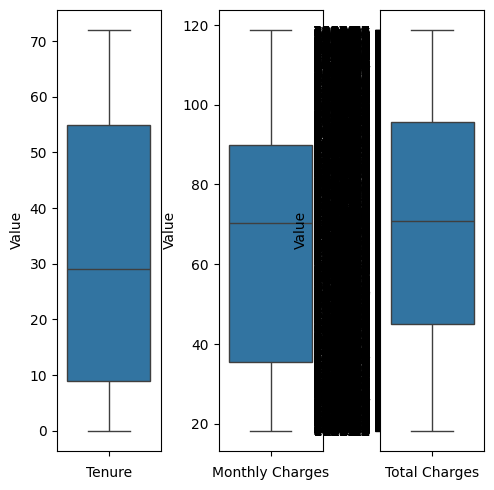

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(5, 5)) 
fig.tight_layout()

sns.boxplot(data=df['tenure'], ax = ax[0])
ax[0].set_xlabel("Tenure")
ax[0].set_ylabel("Value")

sns.boxplot(data=df['MonthlyCharges'], ax = ax[1])
ax[1].set_xlabel("Monthly Charges")
ax[1].set_ylabel("Value")

sns.boxplot(data=df['TotalCharges'], ax = ax[2])
ax[2].set_xlabel("Total Charges")
ax[2].set_ylabel("Value")

plt.show()



In [7]:
#The Plots shows there are no outliers


In [8]:
Customer_Demographics = 'gender', 'SeniorCitizen', 'Partner', 'Dependents' 
Account_Information= 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod'
Services = 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
Financial=  'MonthlyCharges', 'TotalCharges'

### 1.2 Class Imbalance Analysis

Text(0.5, 1.0, 'Churn variable value counts')

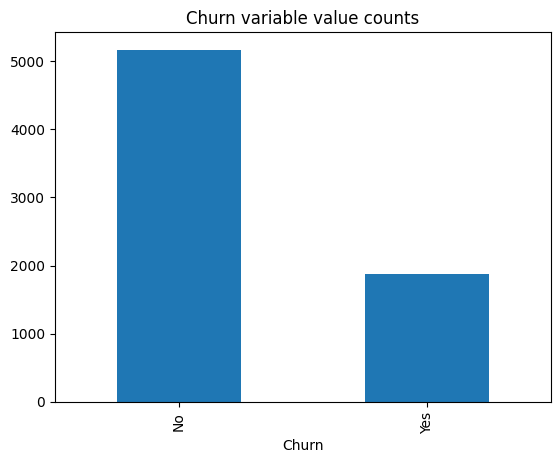

In [9]:
fig = df['Churn'].value_counts().plot(kind='bar')
fig.set_title("Churn variable value counts")

The Plot clearly shows that there is a class imbalance between the churn and non churn classes in the target variable

In [10]:
churn_class = df['Churn'].value_counts()[0]
non_churn_class = df['Churn'].value_counts()[1]

imbalance_ratio = churn_class/non_churn_class
print("The Imbalance Ratio of the target variable of the dataset - ",imbalance_ratio)

The Imbalance Ratio of the target variable of the dataset -  2.7683253076511503


C:\Users\dulin\AppData\Local\Temp\ipykernel_33212\3803234663.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_class = df['Churn'].value_counts()[0]
C:\Users\dulin\AppData\Local\Temp\ipykernel_33212\3803234663.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  non_churn_class = df['Churn'].value_counts()[1]


The target variable has an imbalance ratio of 2.768. This implies that for 1 non churn record, there are almost 3 churn records. This clearly shows that there is a class imbalance in the dataset with majority of the records being non churn class.


##### Analyzing churn patterns across different customer segments

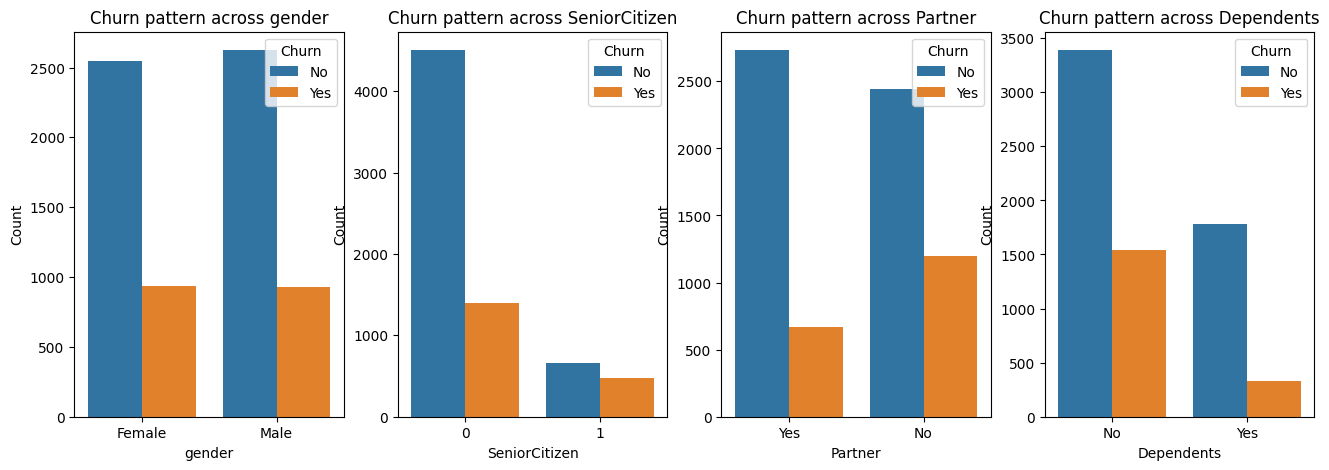

In [11]:
fig, ax = plt.subplots(1,4,figsize=(16, 5))

for count,i in enumerate(Customer_Demographics):
    sns.countplot(data=df, x=i, hue='Churn',ax=ax[count])  
    ax[count].set_title(f'Churn pattern across {i}')
    ax[count].set_xlabel(i)
    ax[count].set_ylabel("Count")

##### Business Context: Why class imbalance matters in churn prediction

Class imbalance matter in churn prediction because when there are significantly more data records for 1 class than the other, the model becomes biased towards the majority class because of the model learning patterns from the majority class data records. It is  important that we handle the imbalance in order to get a accurate model.

In [12]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 1.3 Advanced Univariate Analysis

### Numerical Features

##### Distribution analysis

In [13]:
categorcal_features = "gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"